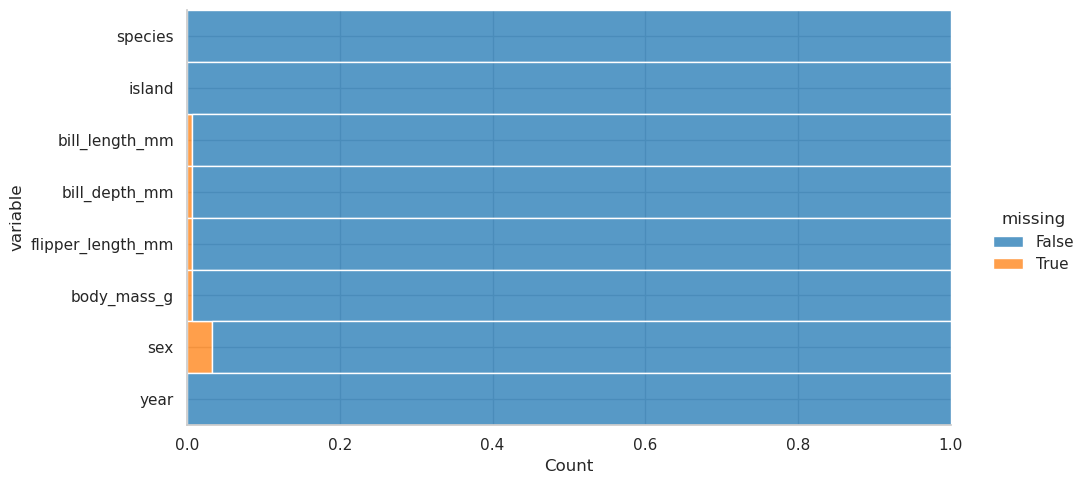

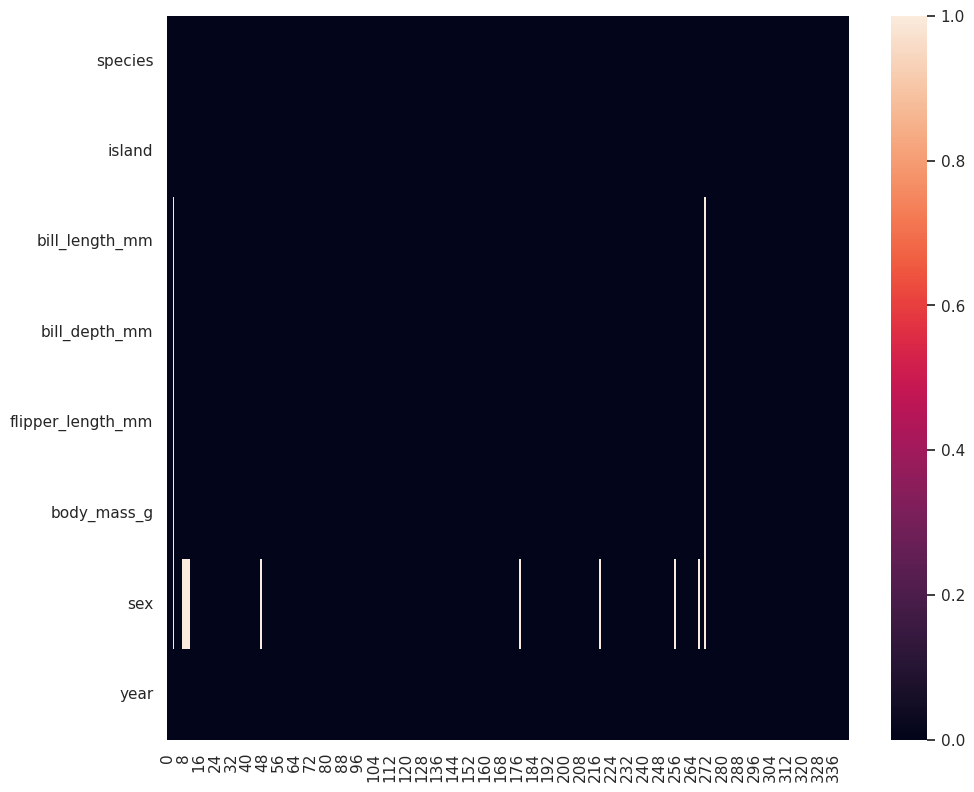

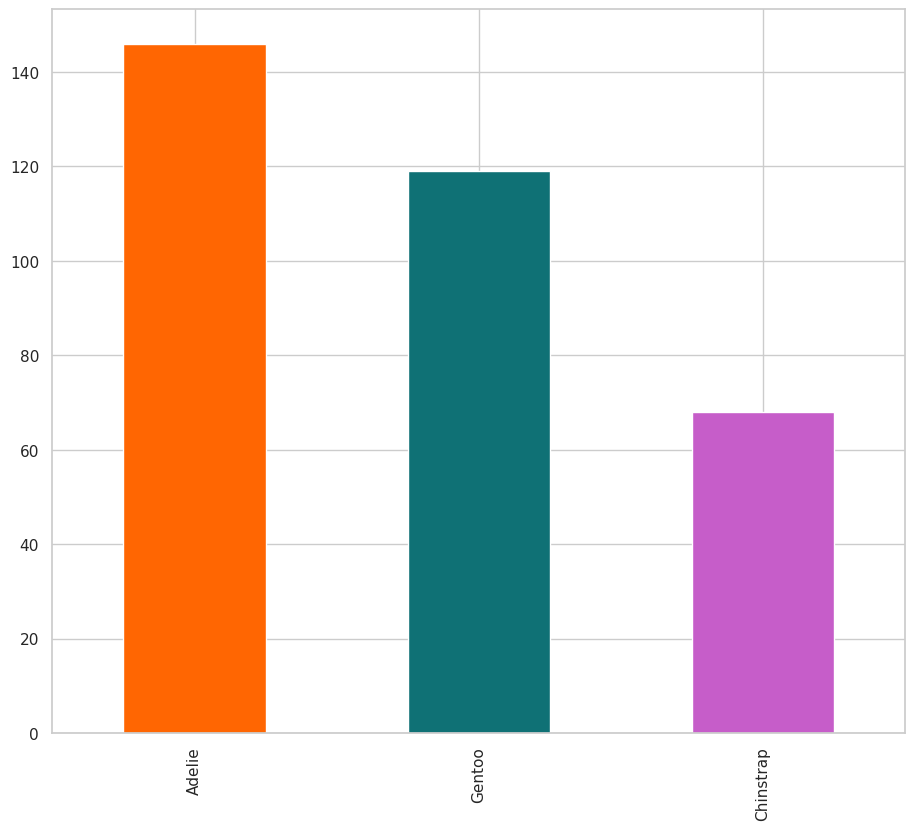

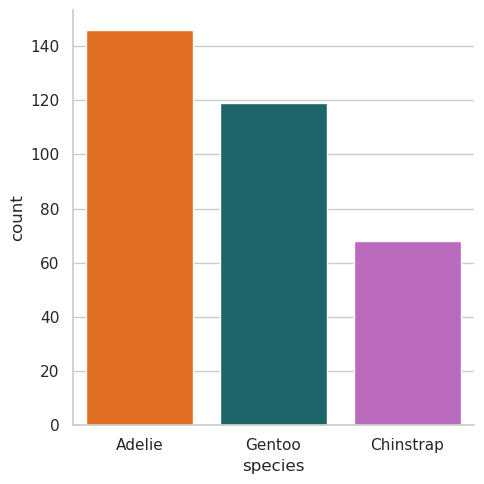

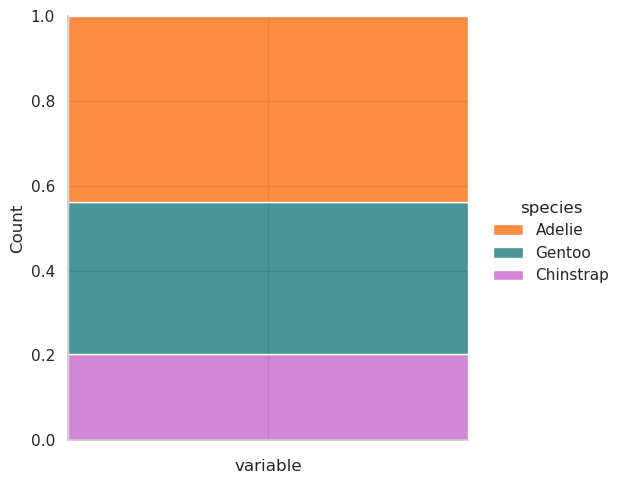

/tmp/ipykernel_48509/1098114682.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()
/tmp/ipykernel_48509/1658957529.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()
/tmp/ipykernel_48509/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

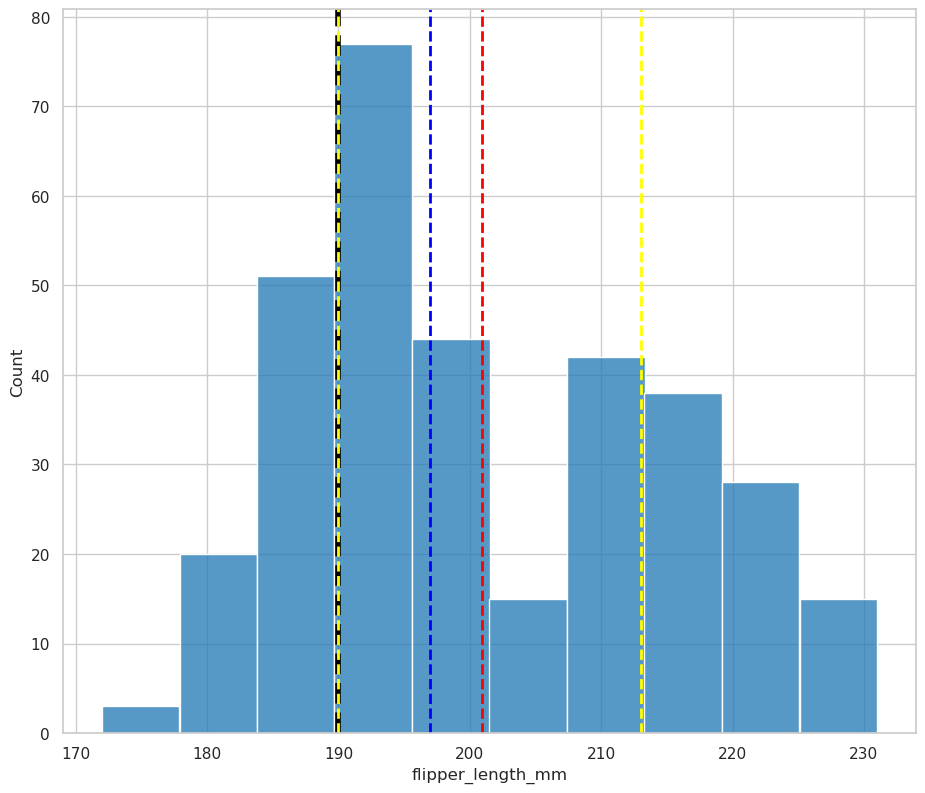

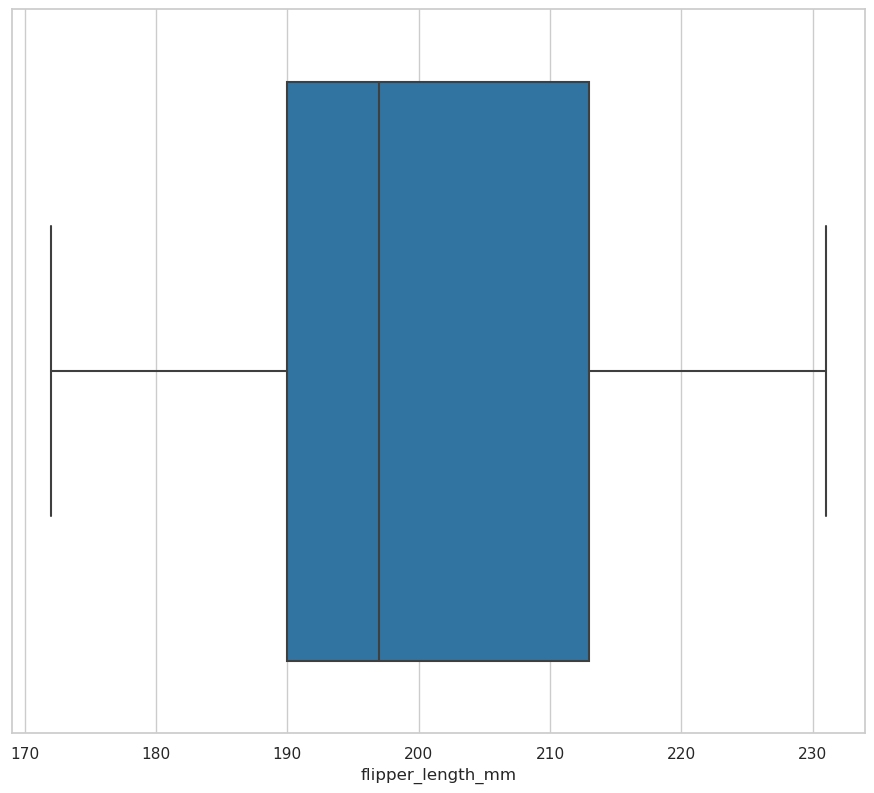

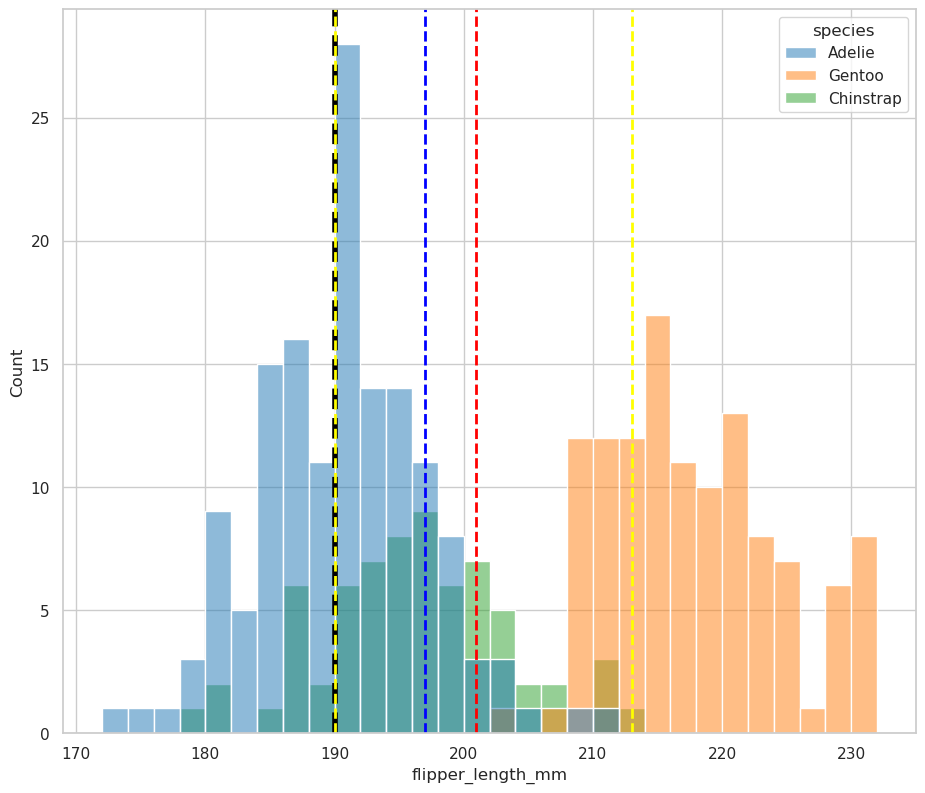

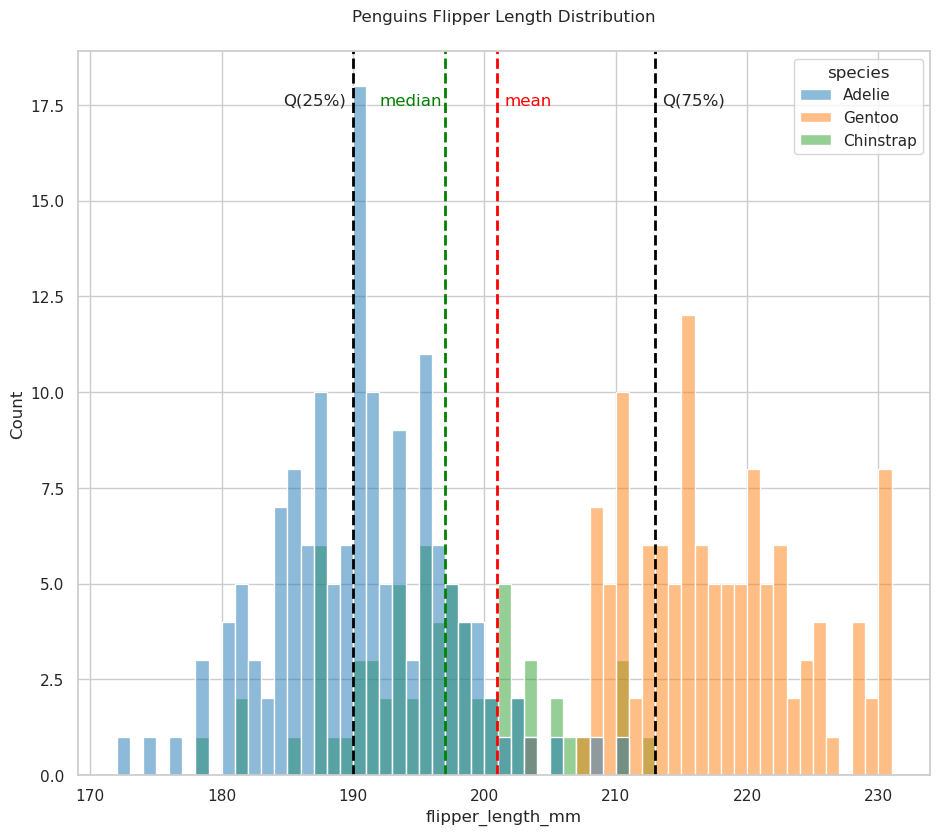

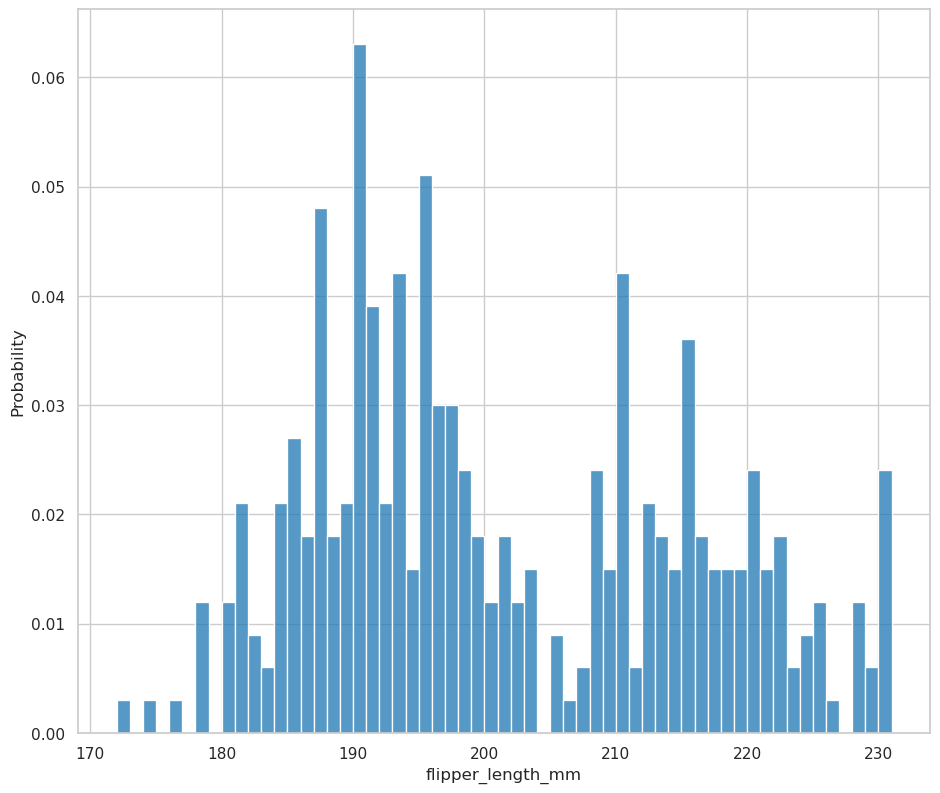

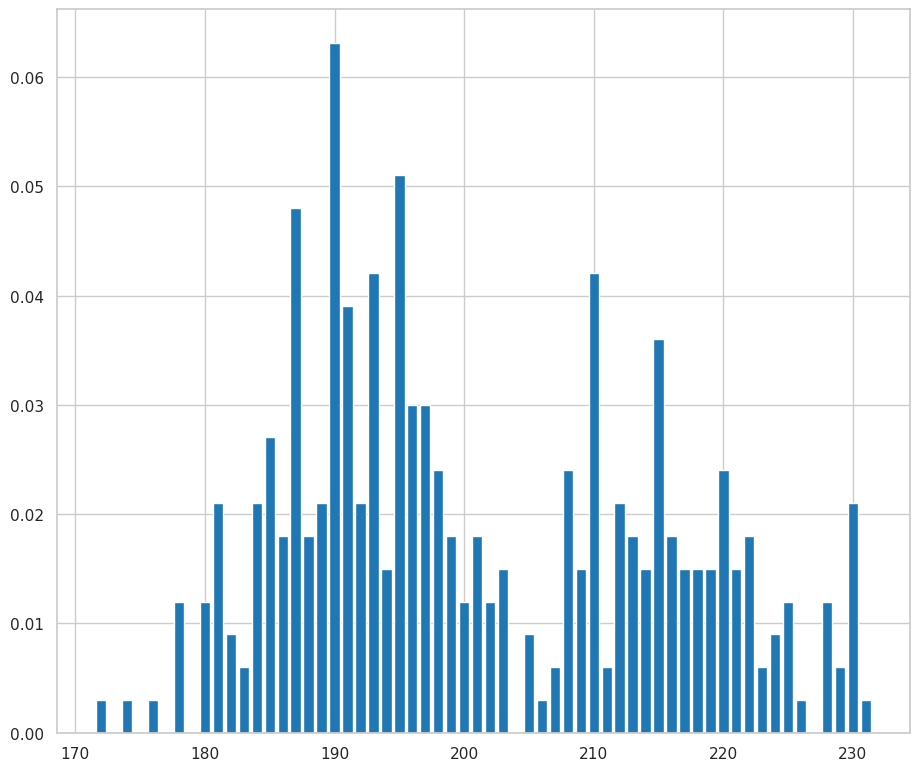

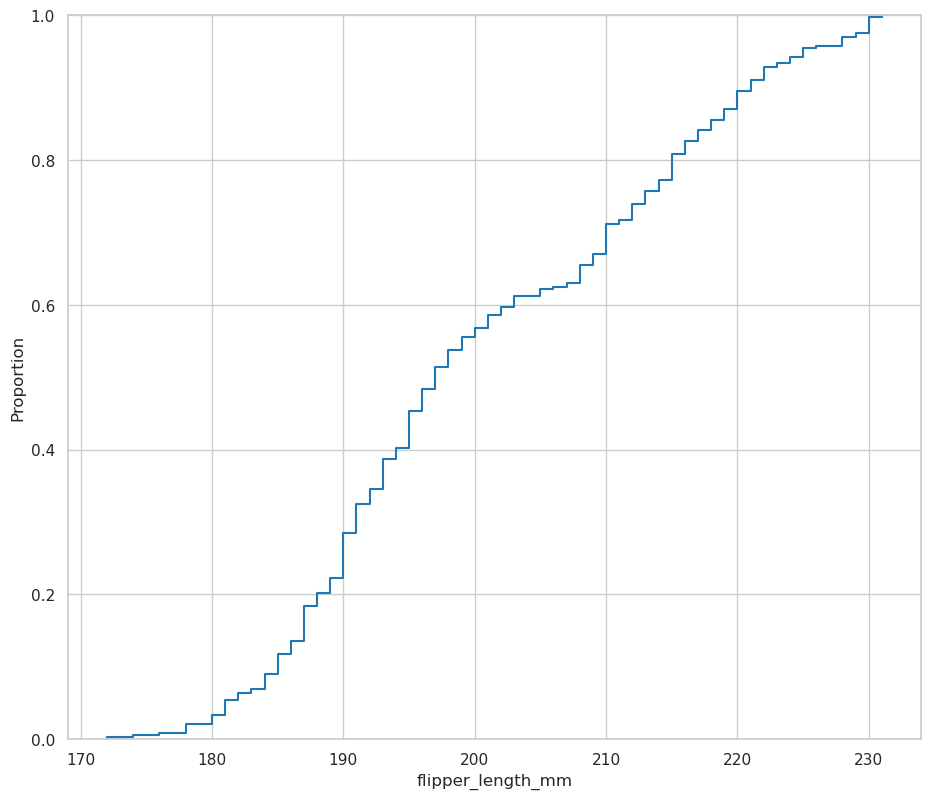

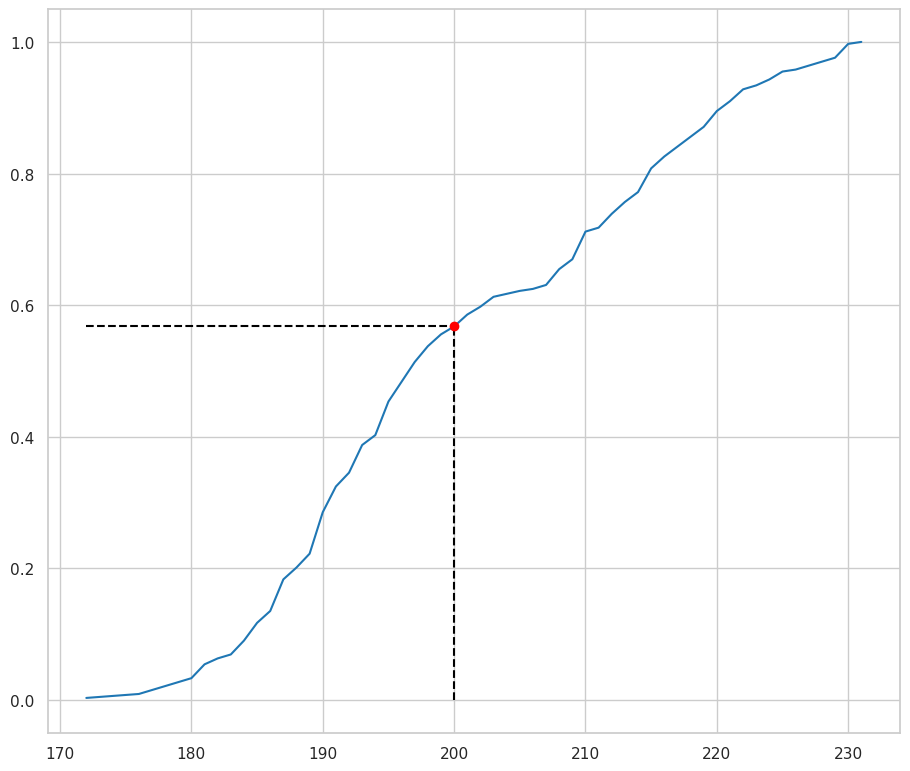

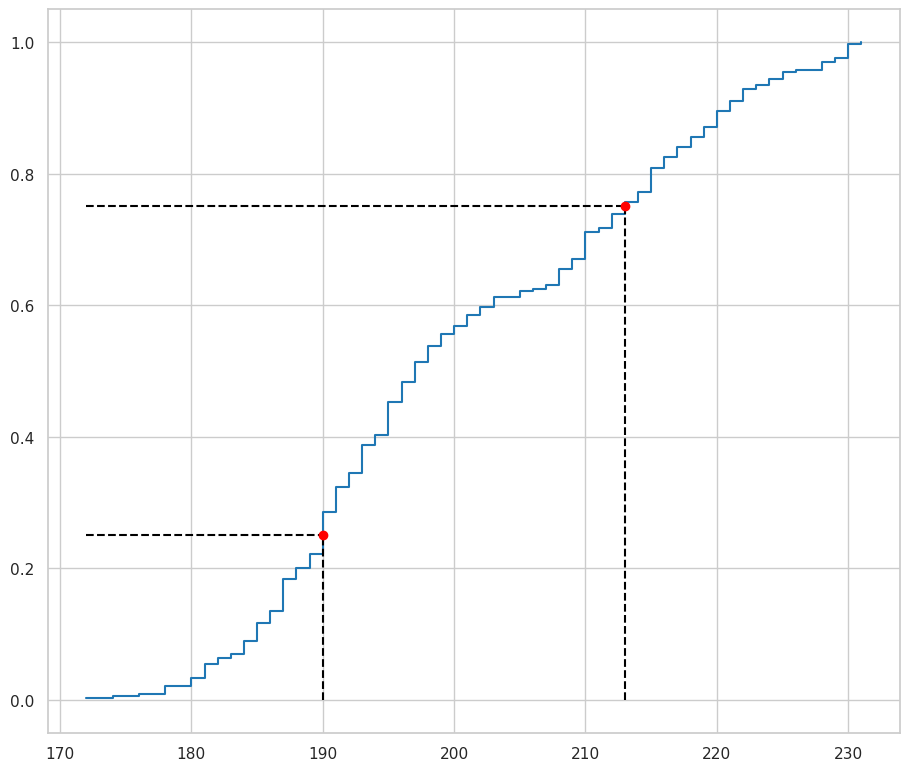

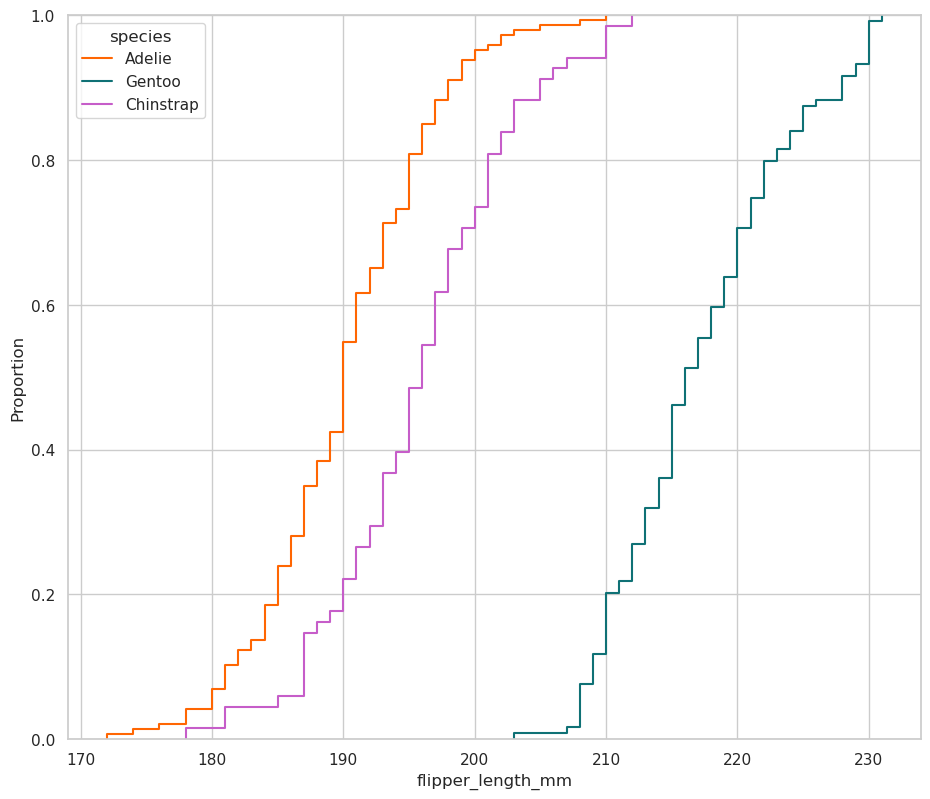

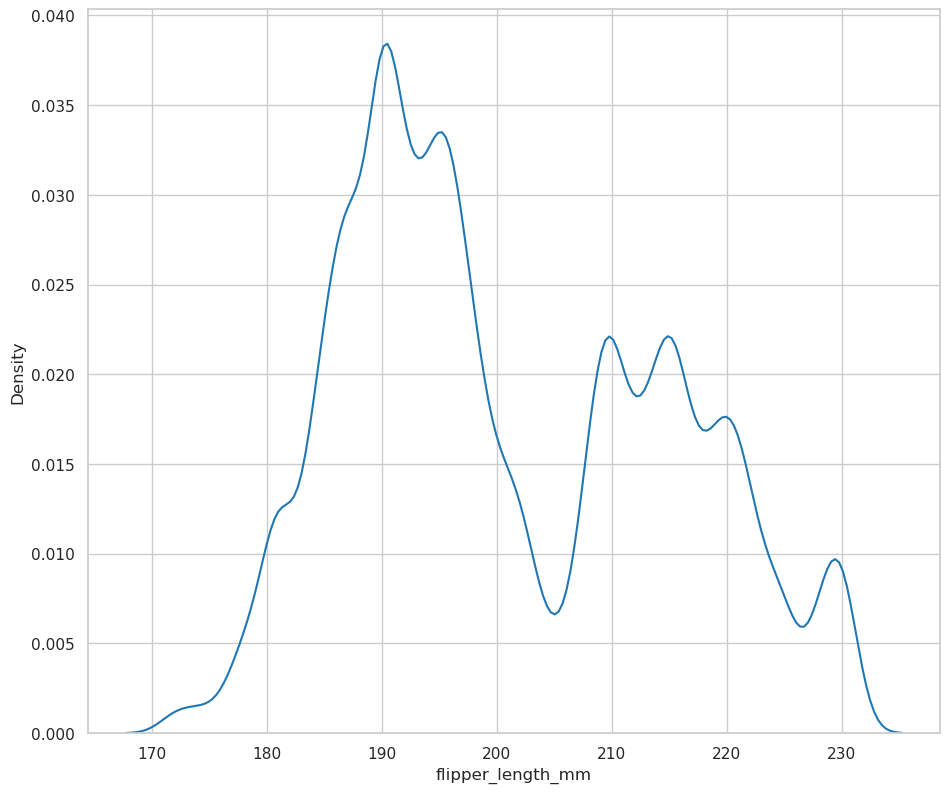

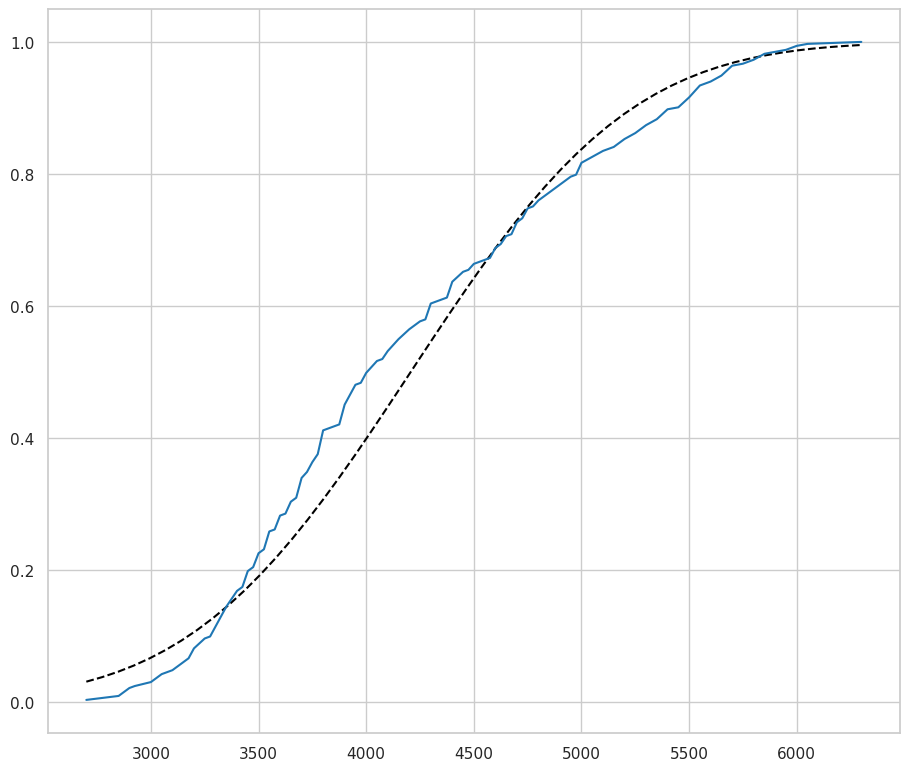

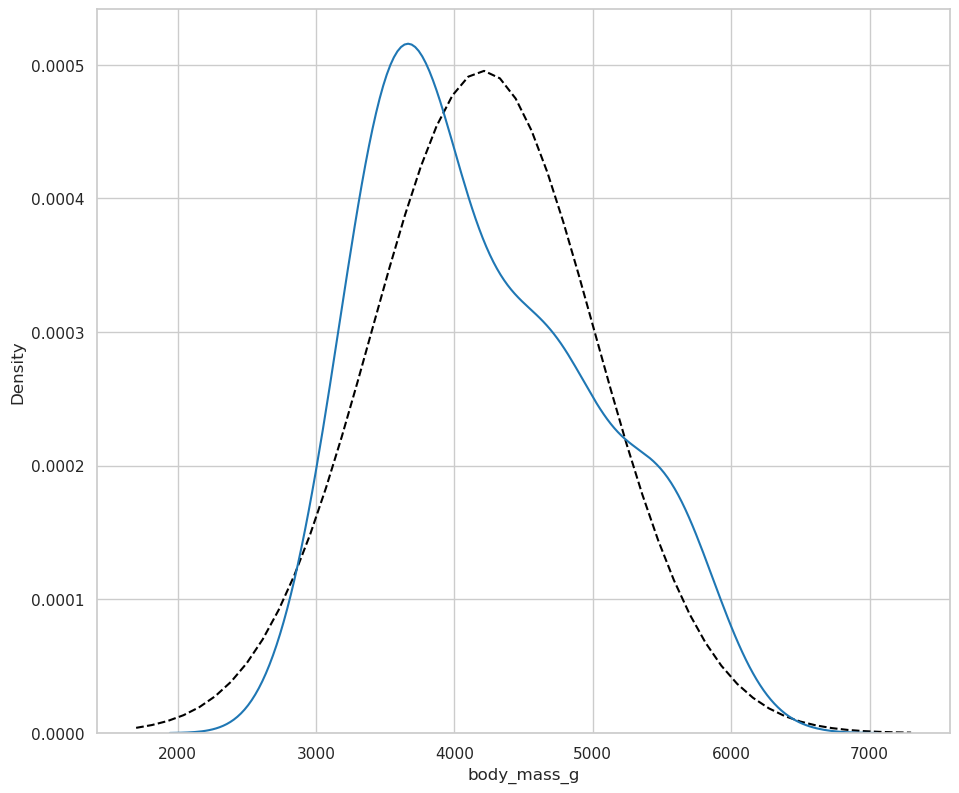

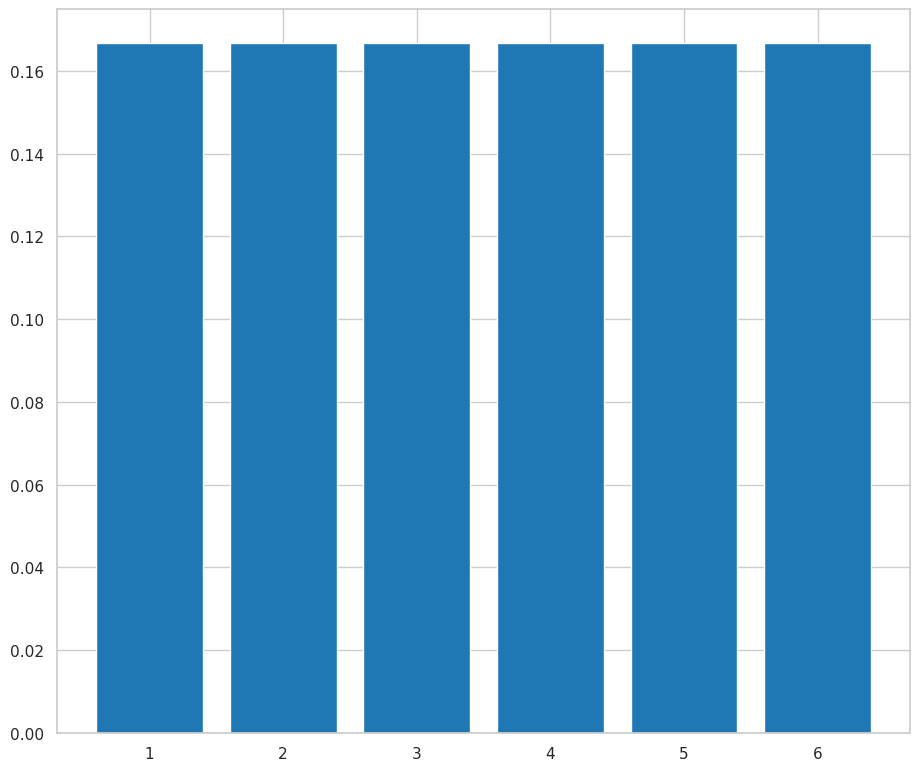

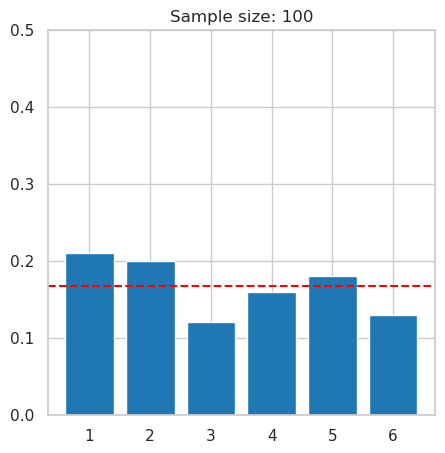

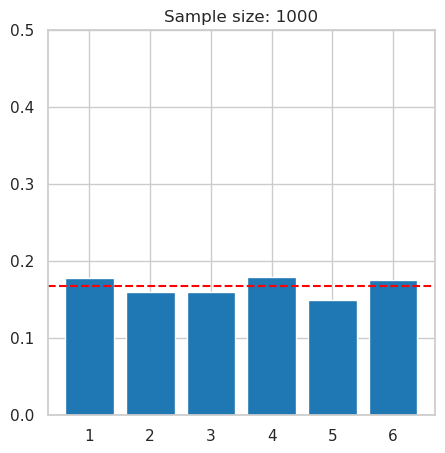

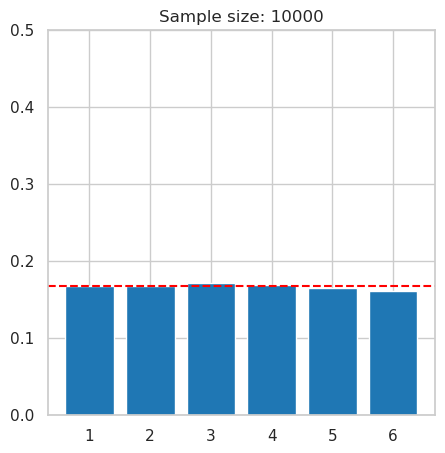

Estimated percentage of male penguins in population is: 50.1829%


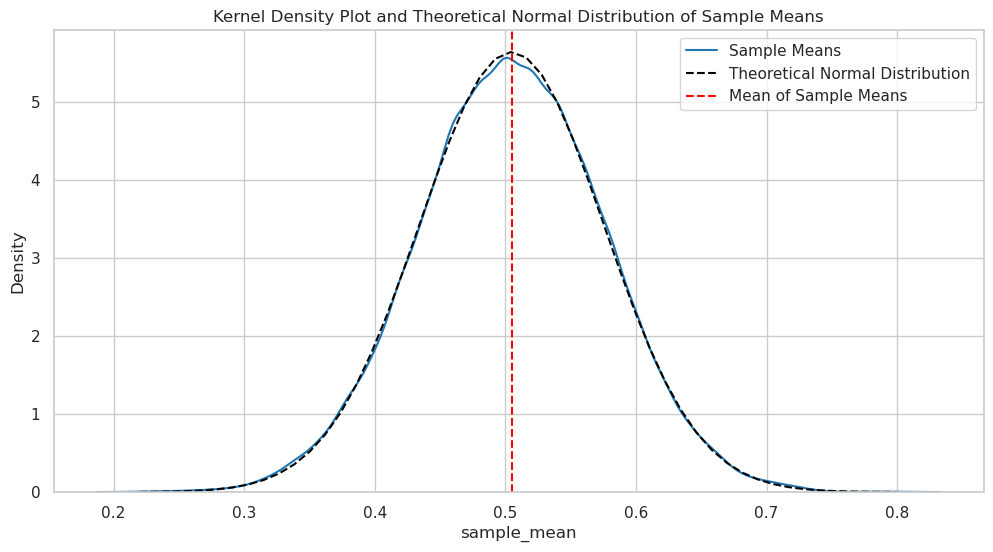

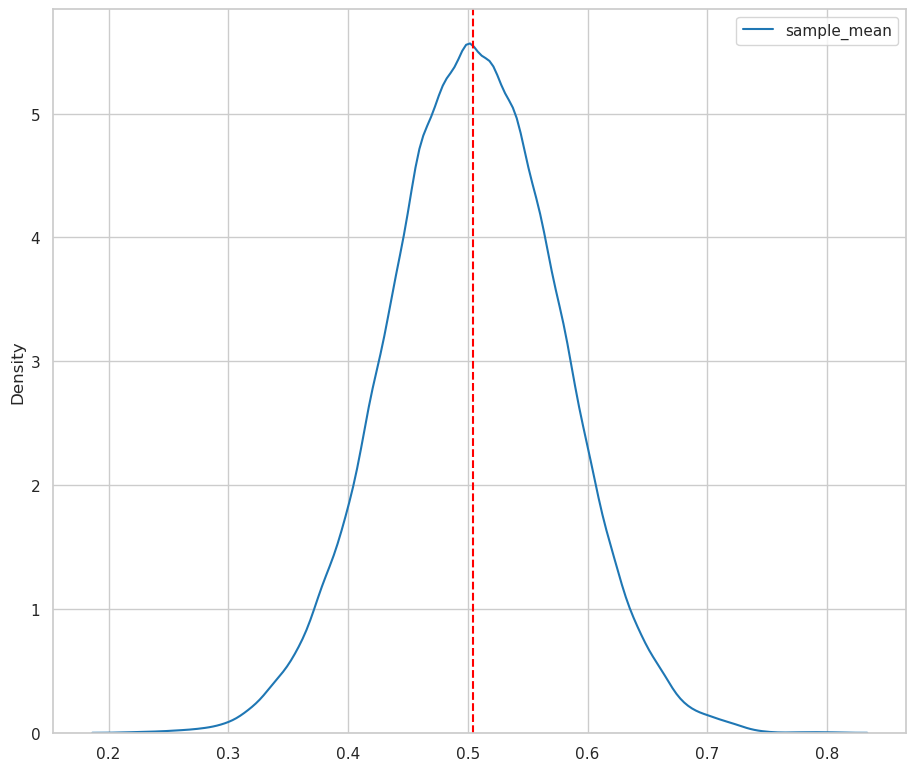

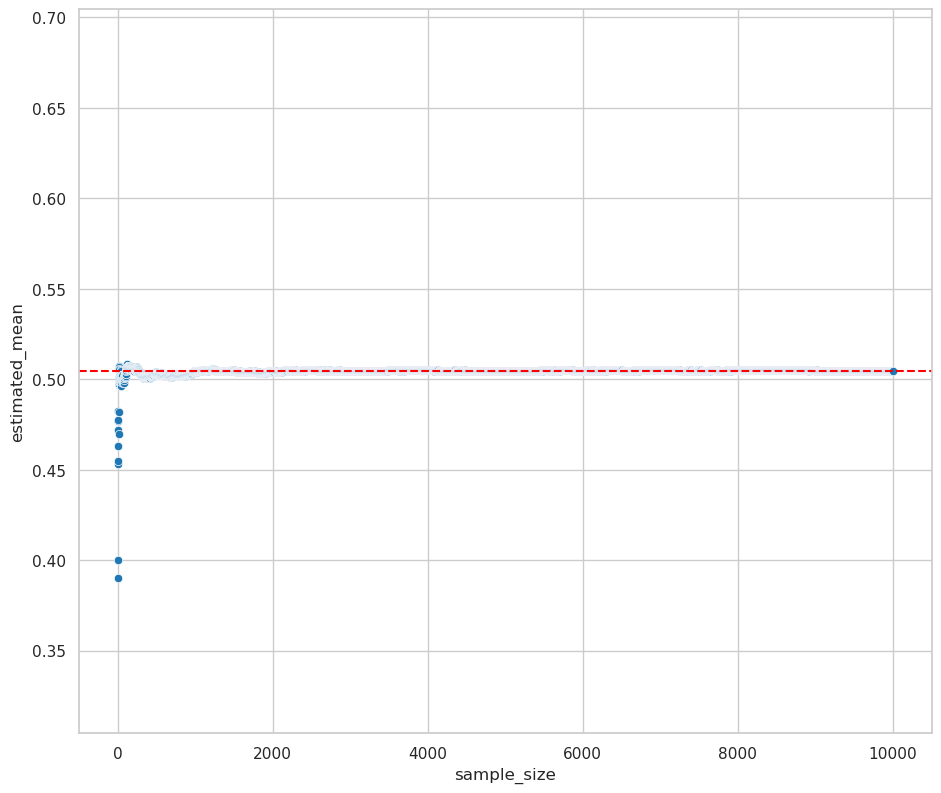

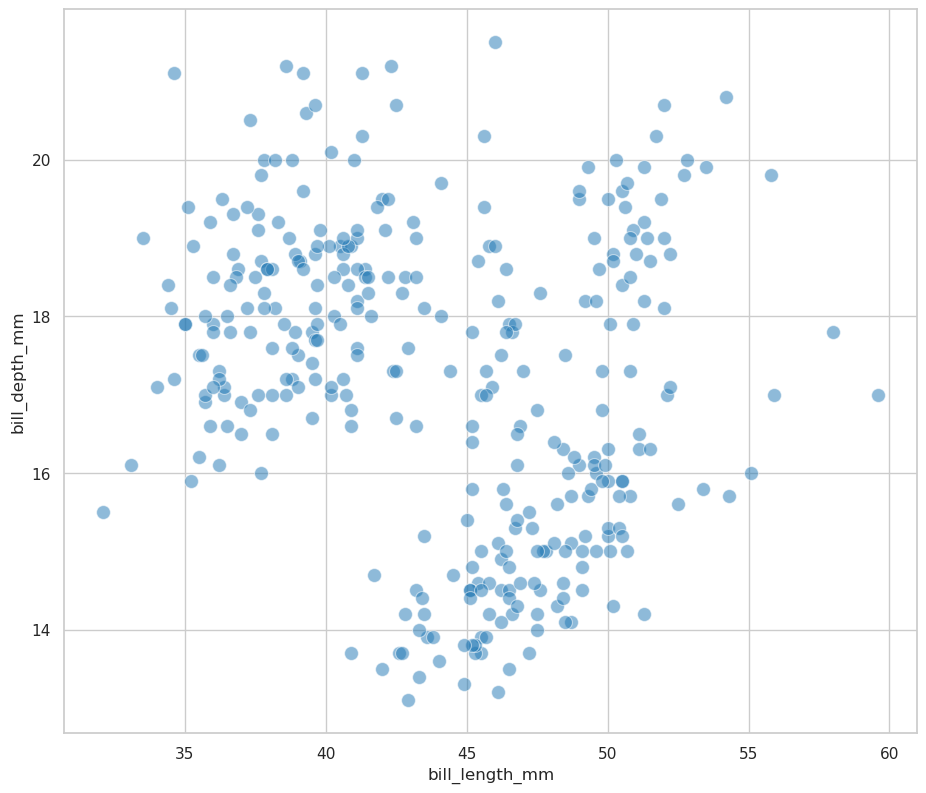

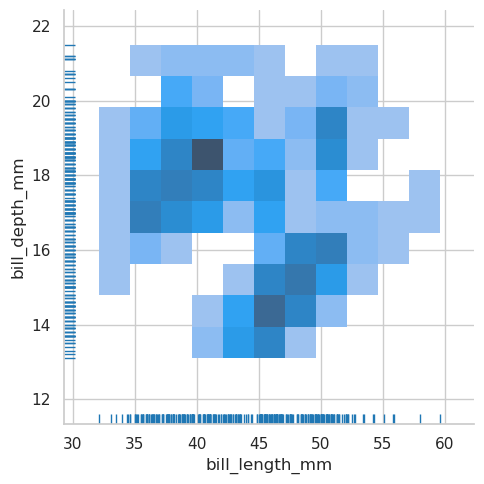

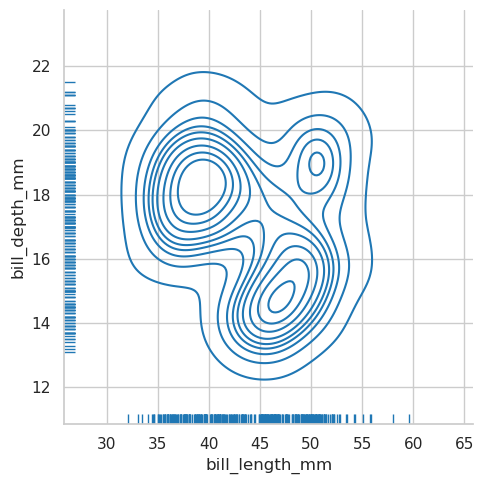

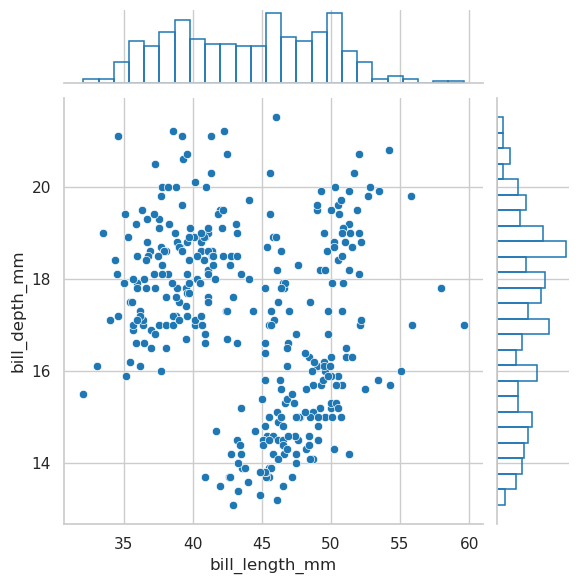

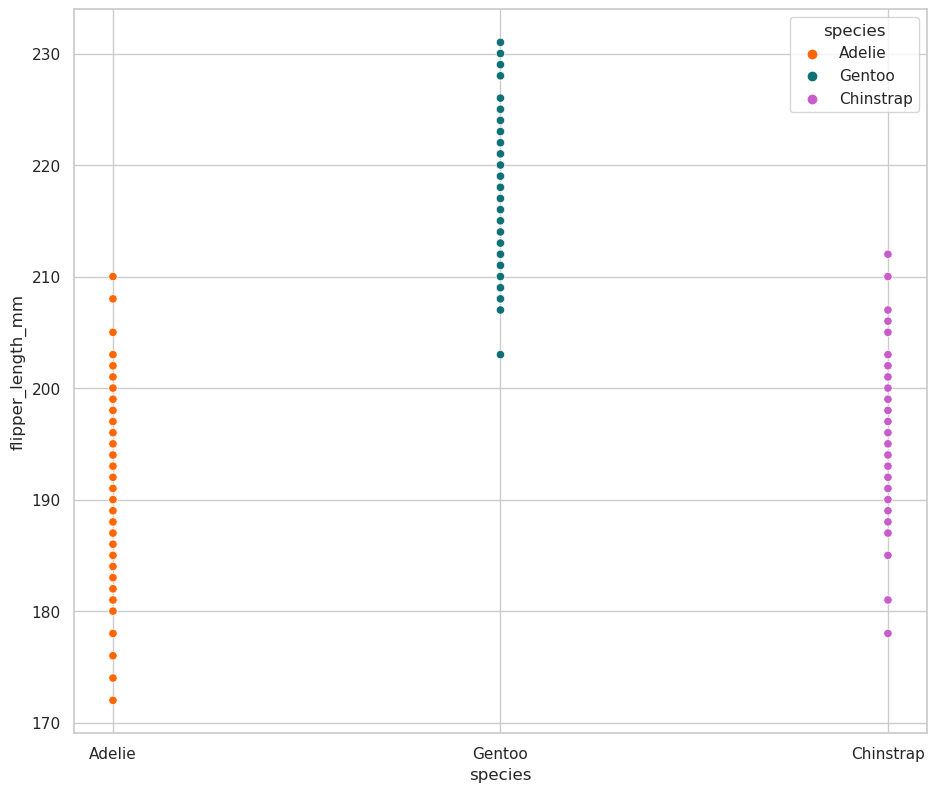

/tmp/ipykernel_48509/826111948.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


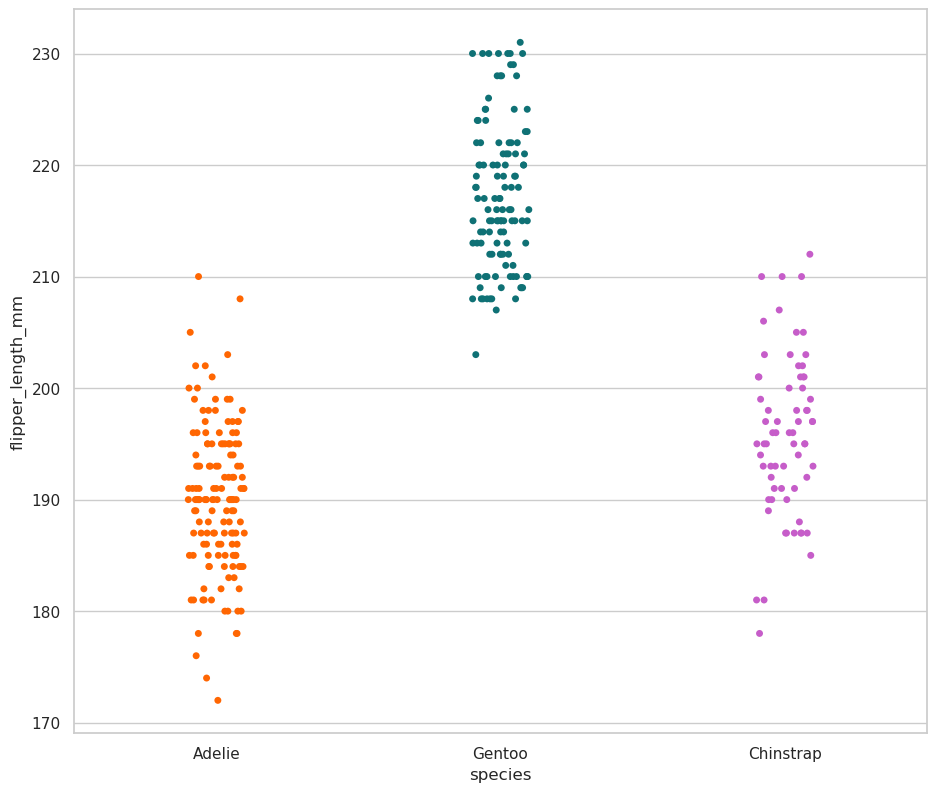

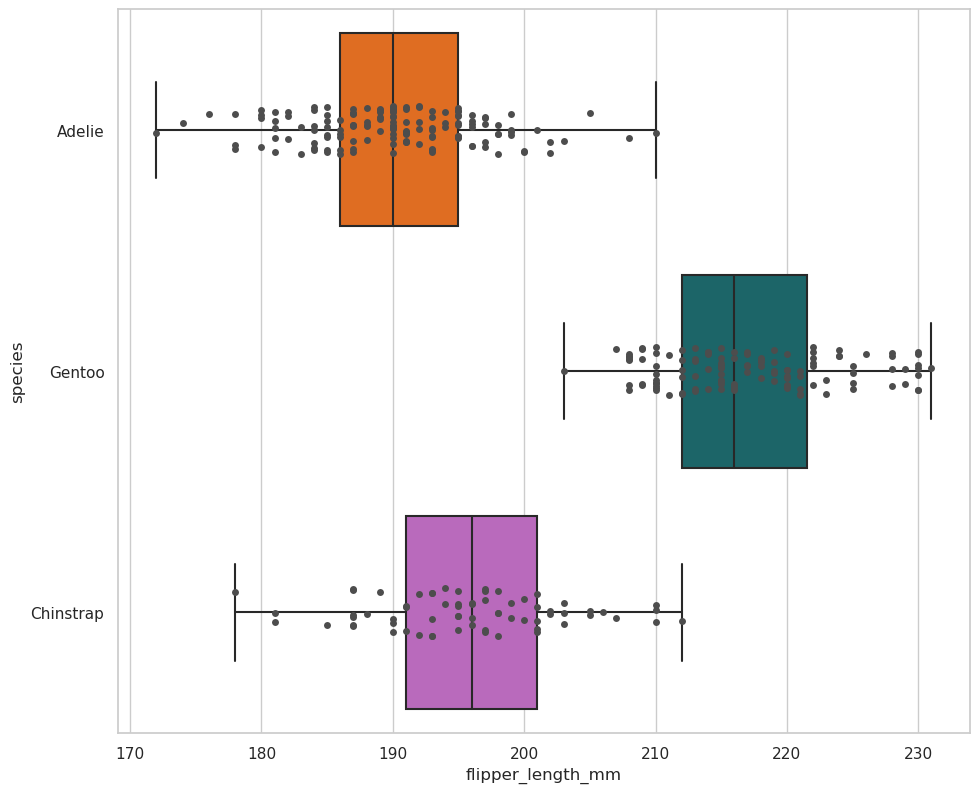

/tmp/ipykernel_48509/1926847696.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


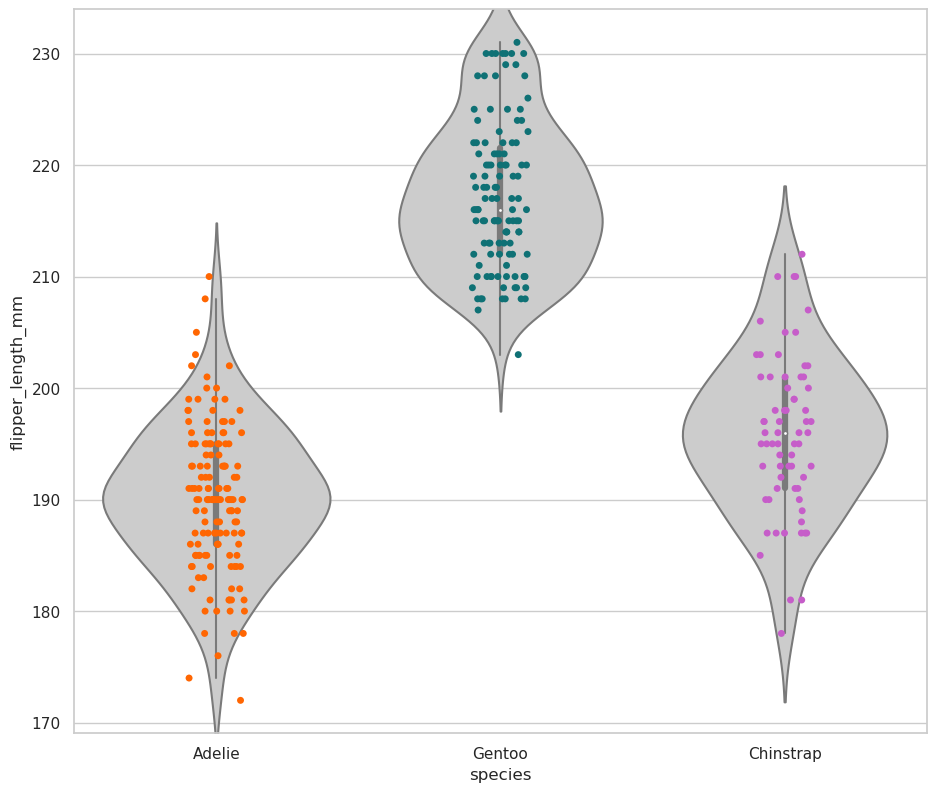

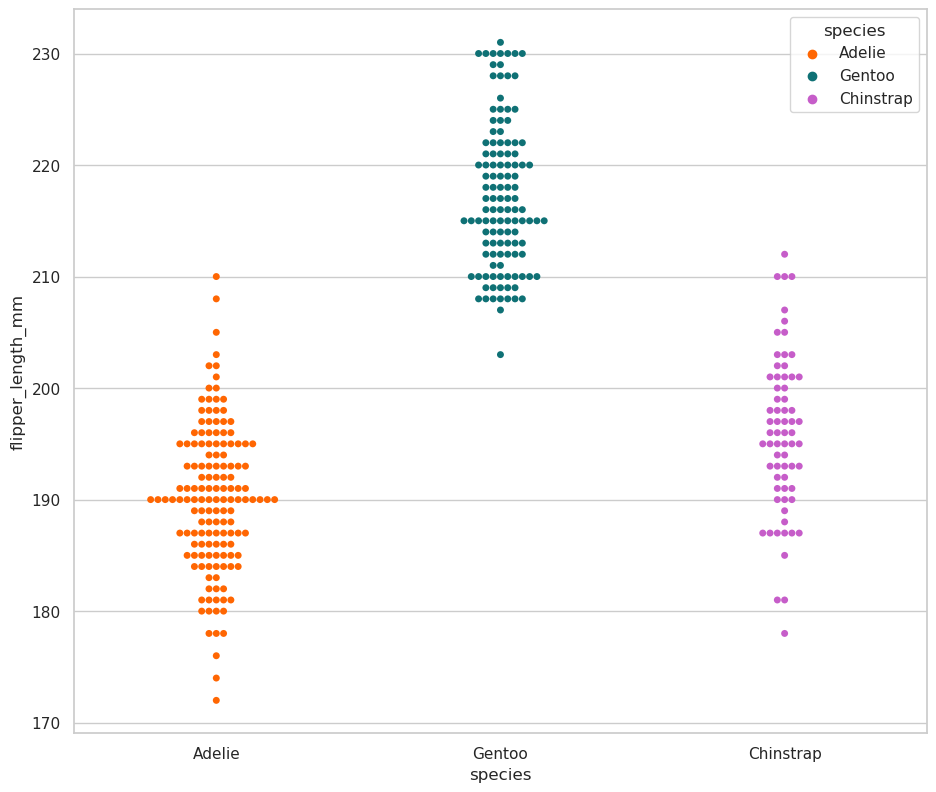

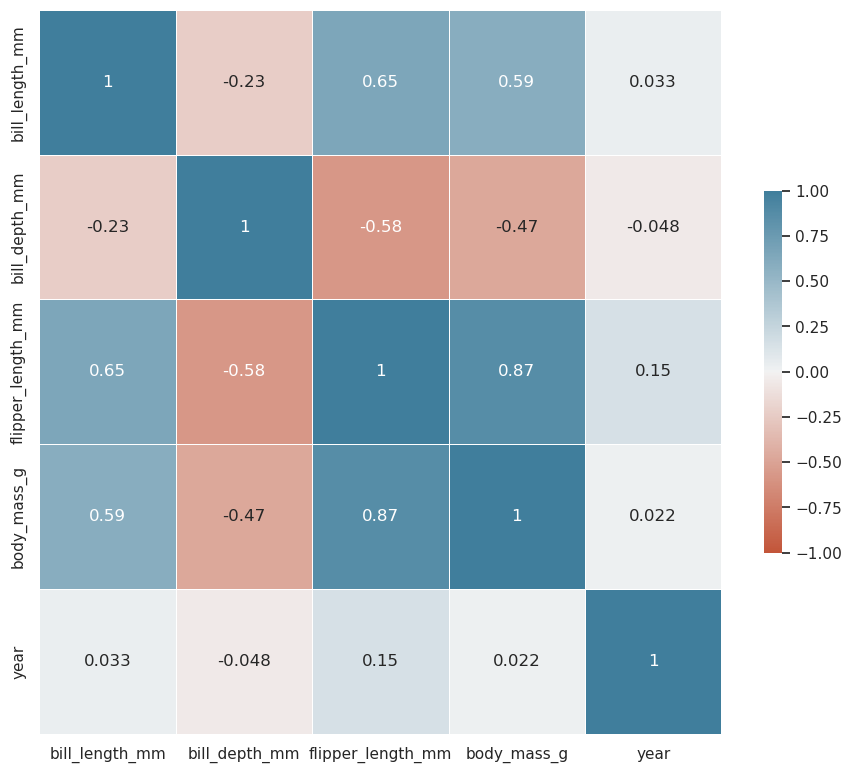

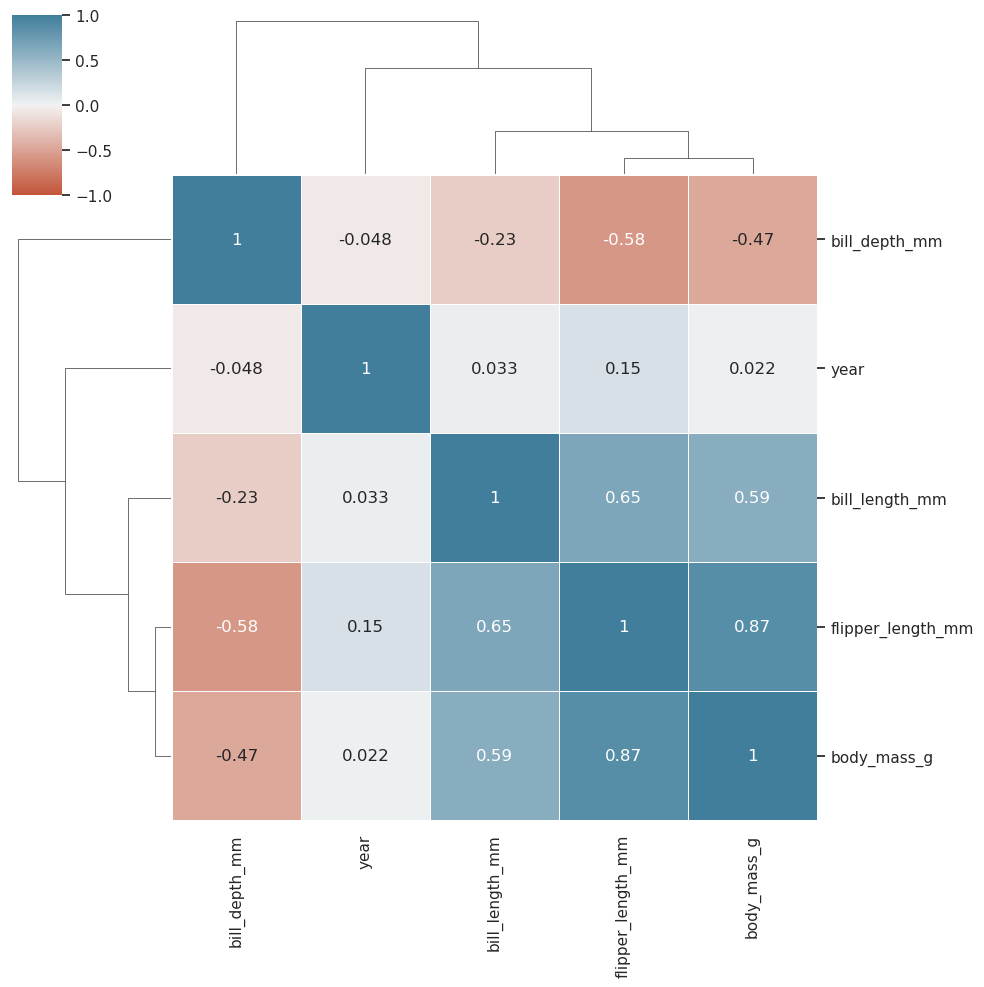

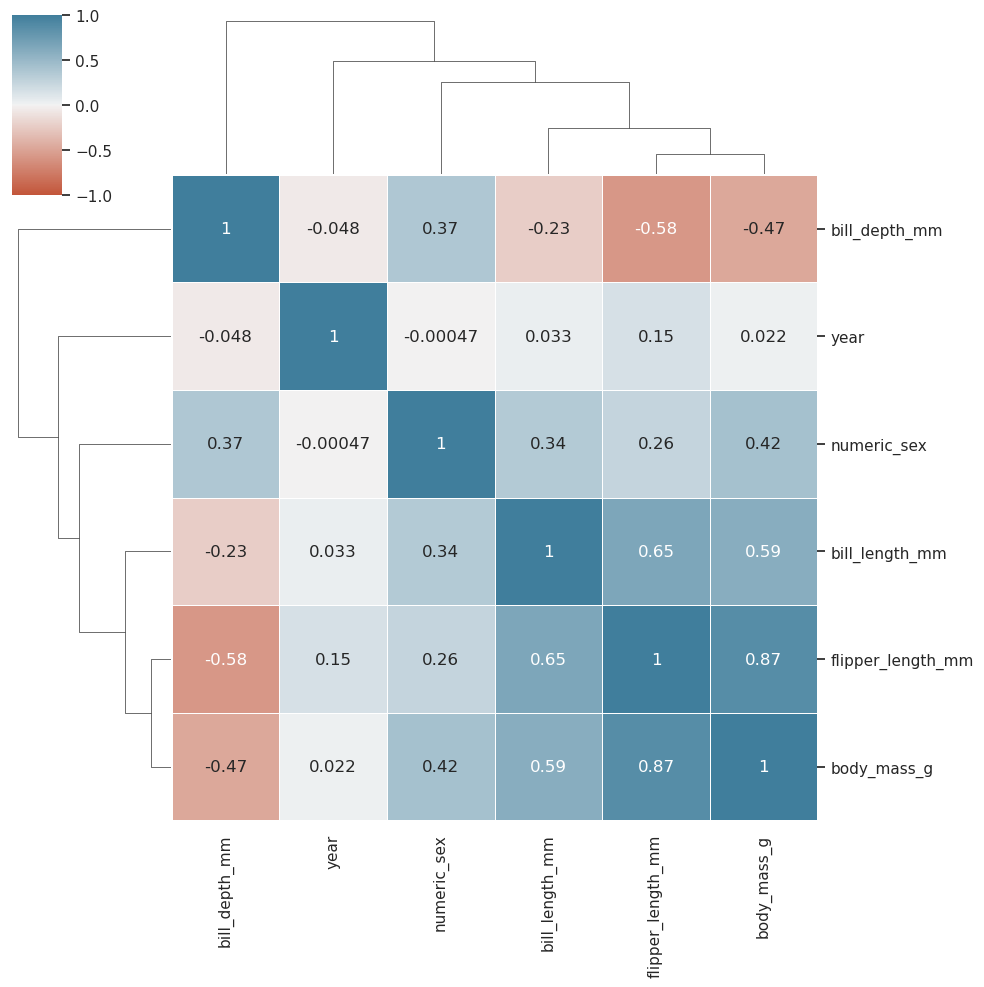

In [1]:
%run "1.1-antoniolml-matricez-correlacion.ipynb"

### ¿Cuál es una límitante de los coeficientes de correlación lineal?

Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.00000000e+00, 8.30638339e-04],
       [8.30638339e-04, 1.00000000e+00]])

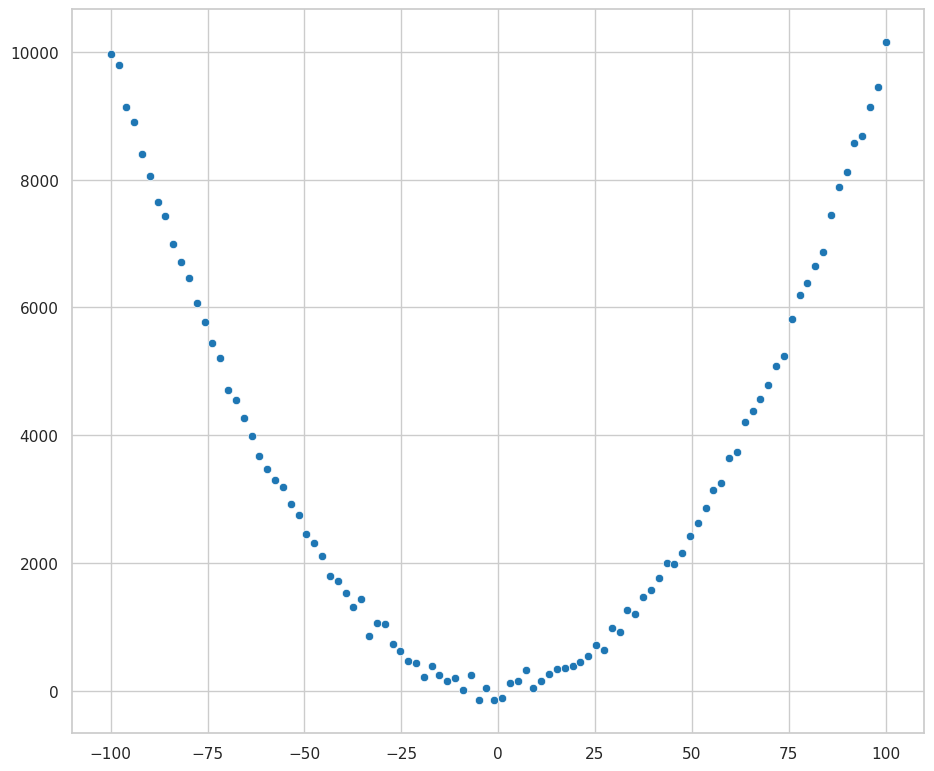

In [2]:
x= np.linspace(-100,100,100)
y=x**2
y+=np.random.normal(0,100,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

array([[1.        , 0.91653735],
       [0.91653735, 1.        ]])

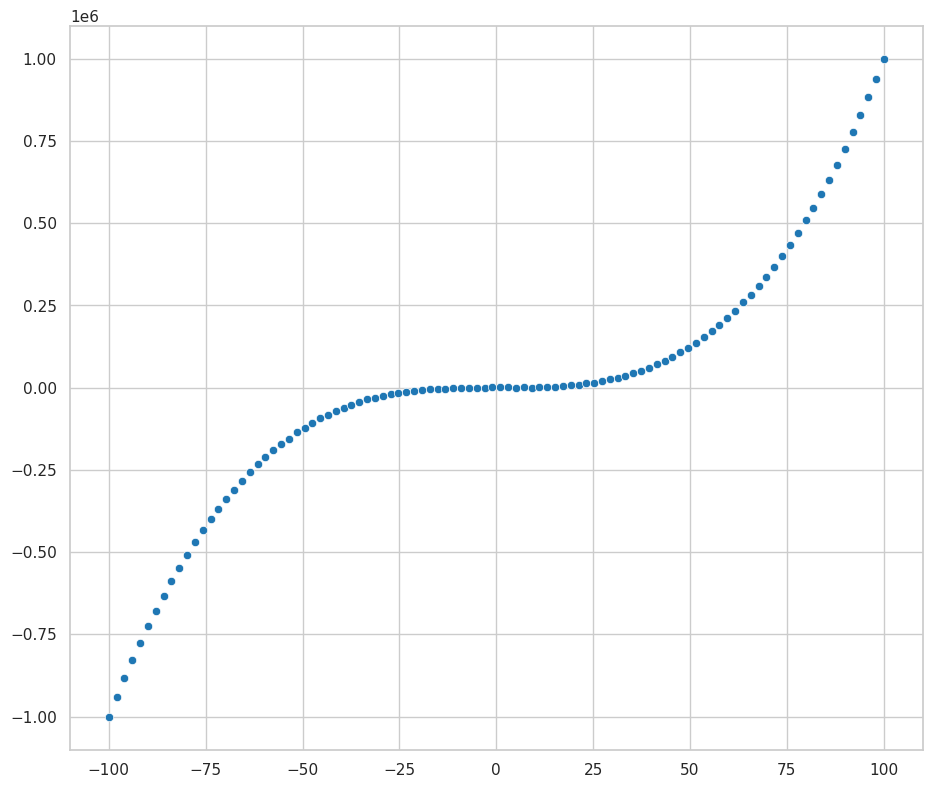

In [3]:
x=np.linspace(-100,100,100)
y=x**3
y+=np.random.normal(0,1000,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

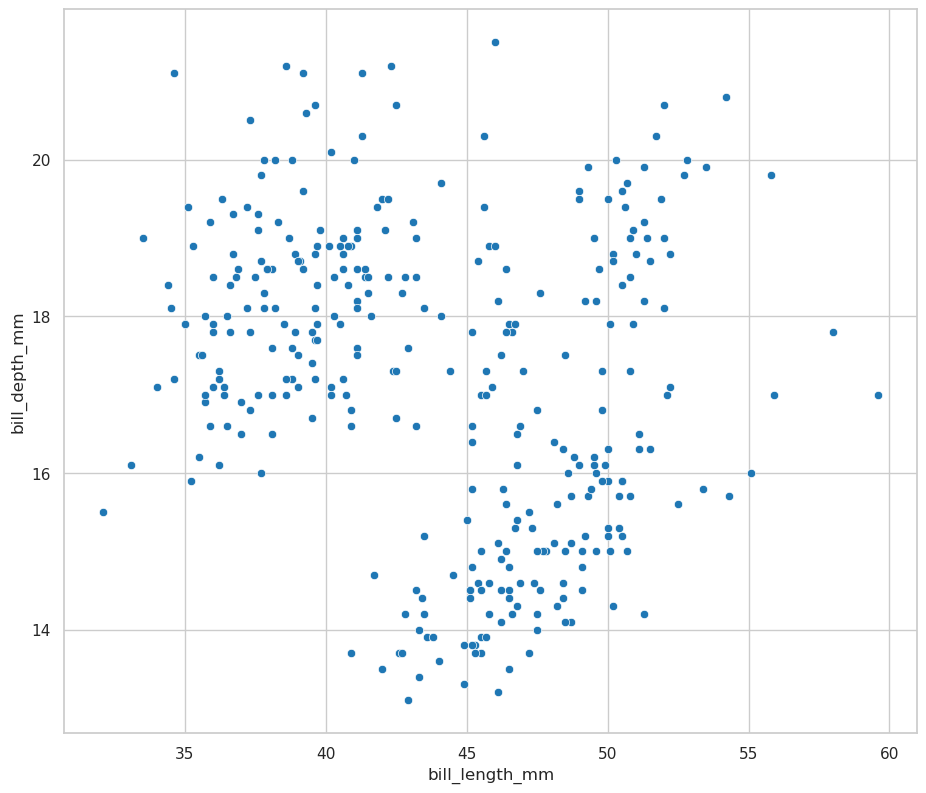

In [4]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.        0.2575176]
 [0.2575176 1.       ]]
[[1.         0.16003995]
 [0.16003995 1.        ]]


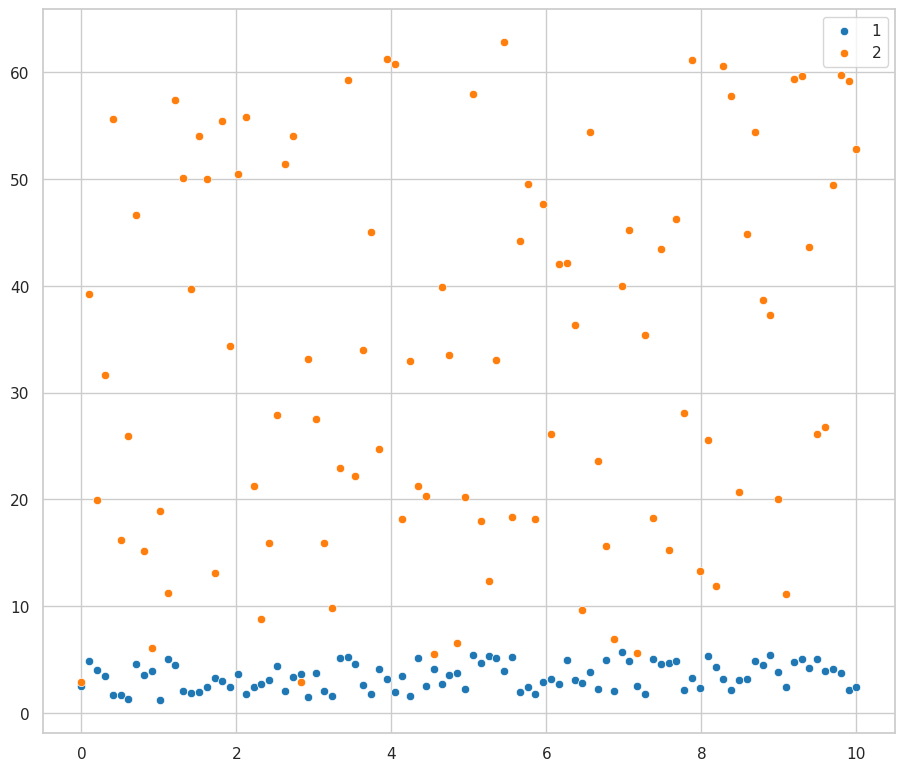

In [5]:
np.random.seed(42)
x_1=np.linspace(0,10,100)
y_1=0.1*x_1+3+np.random.uniform(-2,2,size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2=np.linspace(0,10,100)
y_2=0.5 * x_2 +1 + np.random.uniform(0,60,size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=["1","2"])

print(np.corrcoef(x_1,y_1))
print(np.corrcoef(x_2,y_2))

### Estableciendo relaciones: Análisis de regresión simple

In [6]:
res_1=scipy.stats.linregress(x=x_1,y=y_1)
res_2=scipy.stats.linregress(x=x_2,y=y_2)

print(res_1,res_2, sep="\n")


## slope efecto 
## intercept donde se corte el eje y

LinregressResult(slope=0.10819692809796205, intercept=2.8397383330230275, rvalue=0.2575175999944196, pvalue=0.009693387647021242, stderr=0.041010502840847354, intercept_stderr=0.23737141027424571)
LinregressResult(slope=0.9700084248192304, intercept=28.51986126520522, rvalue=0.1600399518039797, pvalue=0.11171115576721462, stderr=0.6043657503136455, intercept_stderr=3.498107570885823)


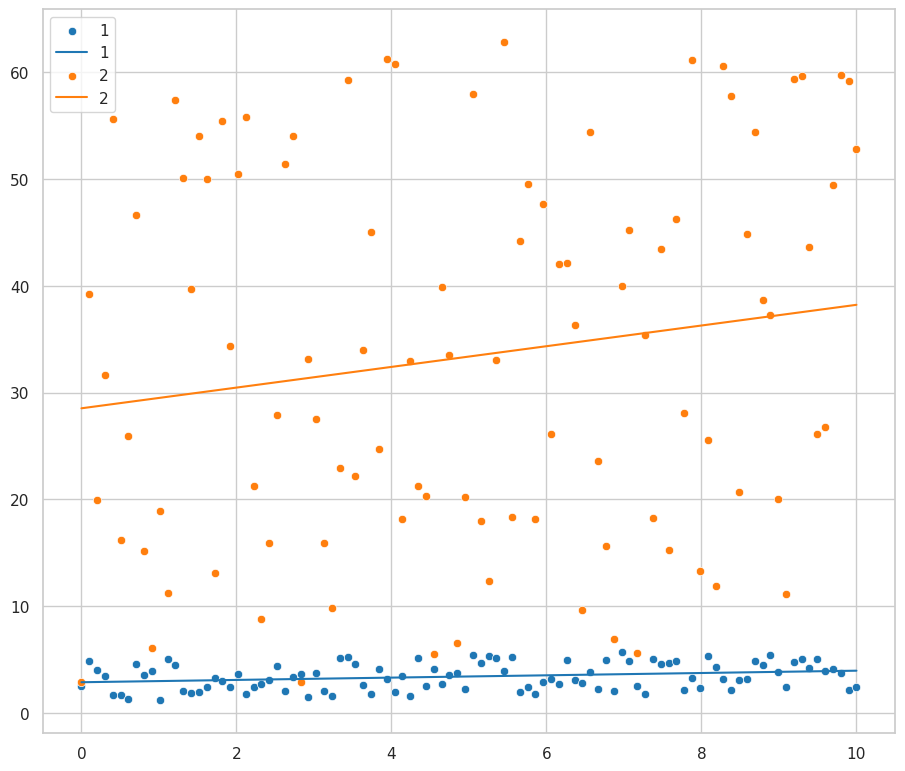

In [7]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1=np.array([x_1.min(),x_1.max()])
fy_1=res_1.intercept+res_1.slope*fx_1

plt.plot(fx_1,fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2=np.array([x_2.min(),x_2.max()])
fy_2=res_2.intercept+res_2.slope*fx_2

plt.plot(fx_2,fy_2)

plt.legend(labels=["1","1","2","2"])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


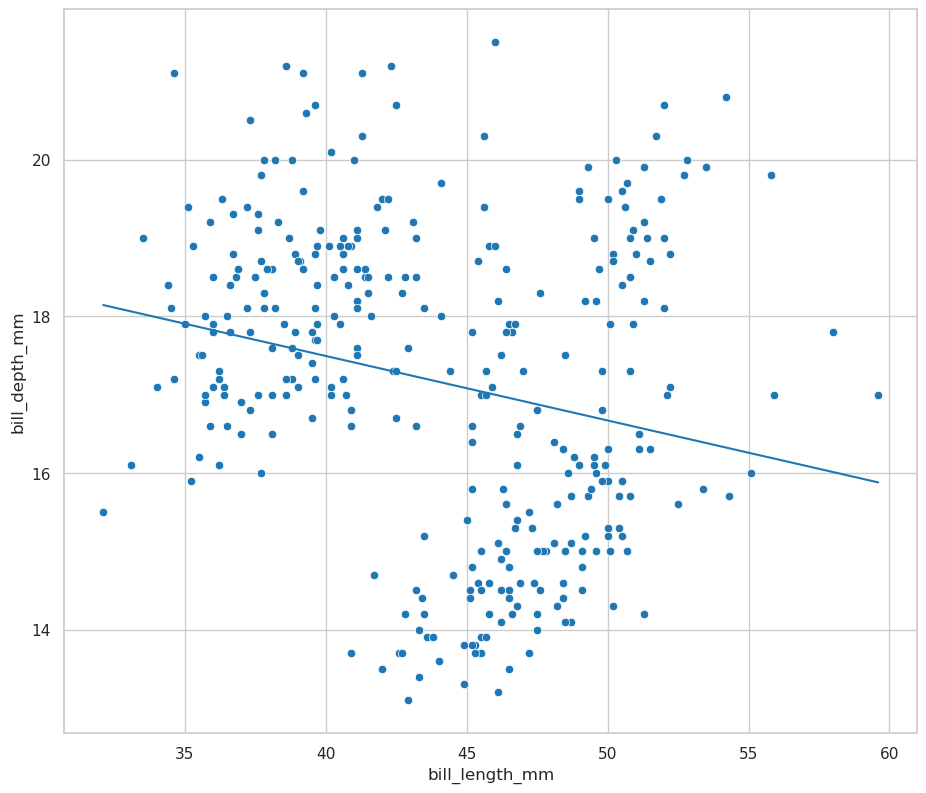

In [8]:
sns.scatterplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
)

res_penguins=scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1=np.array(
    [processed_penguins_df.bill_length_mm.min(),
     processed_penguins_df.bill_length_mm.max()]
)

fy_1=res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1,fy_1)

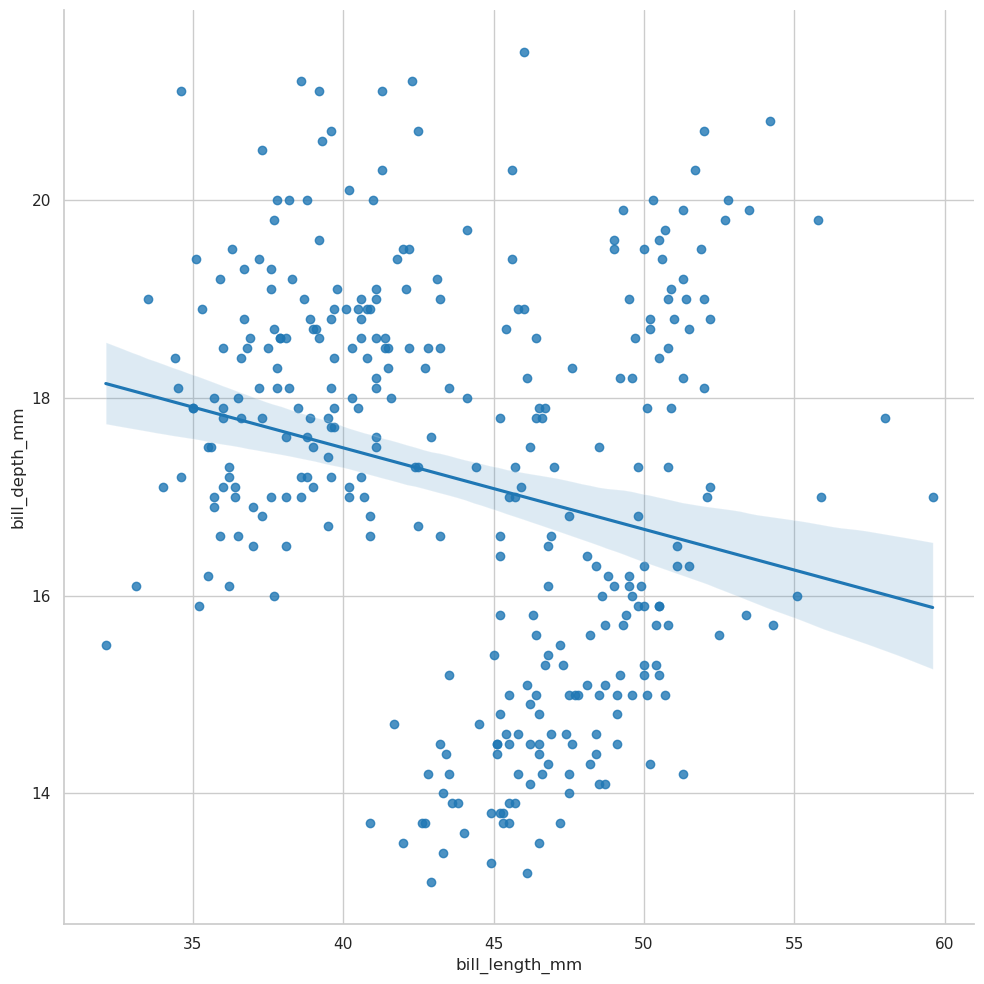

In [9]:
sns.lmplot(
    data=processed_penguins_df,
    x="bill_length_mm",
    y="bill_depth_mm",
    height=10
)

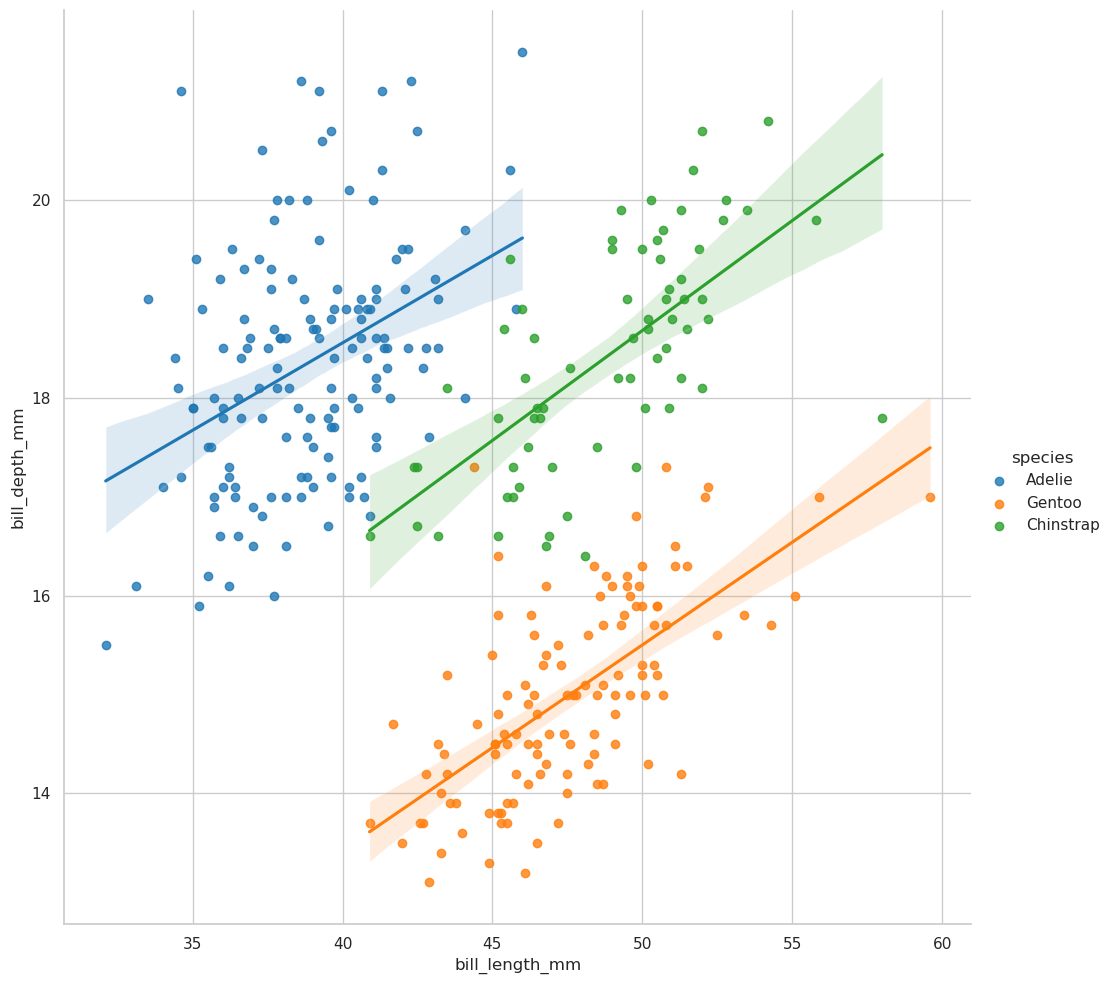

In [10]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)